Número de linhas: 96


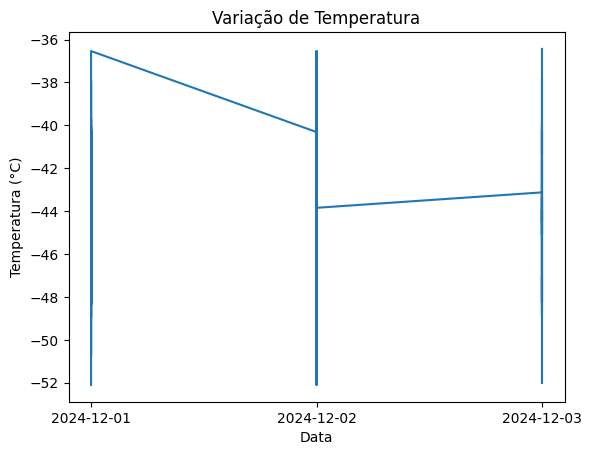

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
dados = pd.read_csv('../dados_sensores.csv').sort_values('Data')
print(f'Número de linhas: {dados.shape[0]}')

# Plotar temperatura ao longo do tempo
plt.plot(dados['Data'], dados['Temperatura (°C)'])
plt.title('Variação de Temperatura')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.show()

Como tem vários sensores dando a resposta em difernetes localizações em cada data, é necessário entender o comportamento por localização

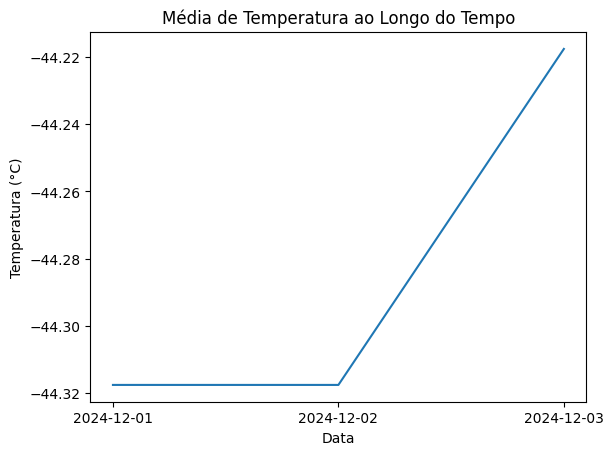

In [48]:
# plotando média de temperatura ao longo das datas
plot_data = dados.groupby('Data')['Temperatura (°C)'].mean()
plt.plot(plot_data.index, plot_data)
plt.title('Média de Temperatura ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.show()

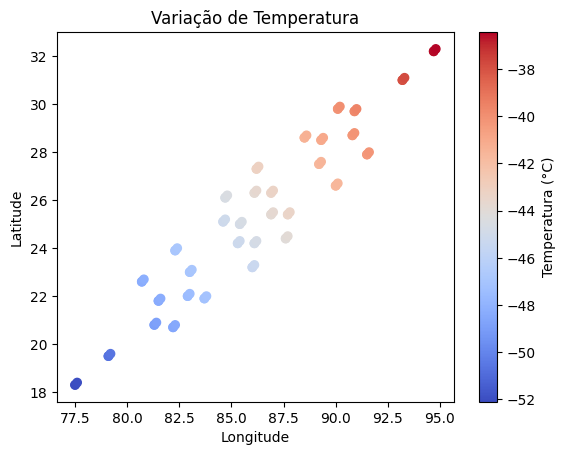

In [49]:
# Quebrando as localizações em duas dimensões
dados["Localização"] # formato 18.3°N 77.5°E
dados["Latitude"] = dados["Localização"].apply(lambda x: float(x.split()[0][:-2]))
dados["Longitude"] = dados["Localização"].apply(lambda x: float(x.split()[1][:-2]))

# Plotar temperatura ao longo das localizações
plt.scatter(dados["Longitude"], dados["Latitude"], c=dados["Temperatura (°C)"], cmap='coolwarm')
plt.title('Variação de Temperatura')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Temperatura (°C)')
plt.show()

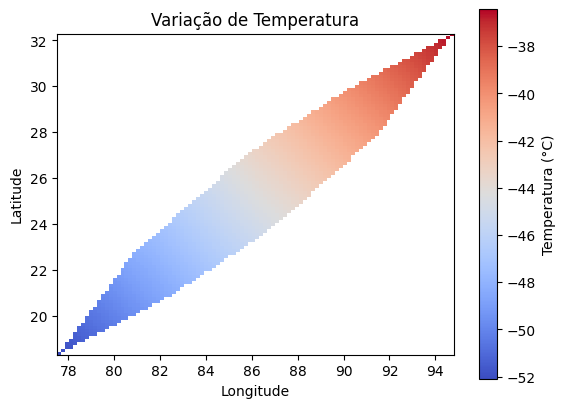

In [50]:
from scipy.interpolate import griddata

# Definindo os pontos de grade
grid_x, grid_y = np.mgrid[min(dados["Longitude"]):max(dados["Longitude"]):100j, min(dados["Latitude"]):max(dados["Latitude"]):100j]

# Interpolando os dados
grid_z = griddata((dados["Longitude"], dados["Latitude"]), dados["Temperatura (°C)"], (grid_x, grid_y), method='cubic')

# Plotando o heatmap
plt.imshow(grid_z.T, extent=(min(dados["Longitude"]), max(dados["Longitude"]), min(dados["Latitude"]), max(dados["Latitude"])), origin='lower', cmap='coolwarm')
plt.title('Variação de Temperatura')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Temperatura (°C)')
plt.show()